## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9836885	total: 47.6ms	remaining: 47.5s
1:	learn: 0.9629817	total: 48.8ms	remaining: 24.3s
2:	learn: 0.9433149	total: 49.6ms	remaining: 16.5s
3:	learn: 0.9264493	total: 50.5ms	remaining: 12.6s
4:	learn: 0.9107792	total: 51.3ms	remaining: 10.2s
5:	learn: 0.8936856	total: 52.3ms	remaining: 8.66s
6:	learn: 0.8756018	total: 53.2ms	remaining: 7.54s
7:	learn: 0.8595925	total: 54ms	remaining: 6.7s
8:	learn: 0.8437732	total: 54.9ms	remaining: 6.05s
9:	learn: 0.8260449	total: 55.9ms	remaining: 5.53s
10:	learn: 0.8106791	total: 56.7ms	remaining: 5.1s
11:	learn: 0.7949963	total: 57.5ms	remaining: 4.74s
12:	learn: 0.7798396	total: 58.3ms	remaining: 4.43s
13:	learn: 0.7644106	total: 59.1ms	remaining: 4.16s
14:	learn: 0.7510096	total: 59.9ms	remaining: 3.93s
15:	learn: 0.7369301	total: 60.8ms	remaining: 3.74s
16:	learn: 0.7250427	total: 61.8ms	remaining: 3.57s
17:	learn: 0.7131317	total: 62.5ms	remaining: 3.41s
18:	learn: 0.7006910	total: 63.3ms	remaining: 3.27s
19:	learn: 0.6861614	total

160:	learn: 0.2379110	total: 185ms	remaining: 964ms
161:	learn: 0.2369506	total: 186ms	remaining: 963ms
162:	learn: 0.2361473	total: 187ms	remaining: 961ms
163:	learn: 0.2355468	total: 188ms	remaining: 959ms
164:	learn: 0.2349941	total: 189ms	remaining: 956ms
165:	learn: 0.2343131	total: 190ms	remaining: 954ms
166:	learn: 0.2336975	total: 191ms	remaining: 951ms
167:	learn: 0.2331988	total: 192ms	remaining: 948ms
168:	learn: 0.2326059	total: 192ms	remaining: 946ms
169:	learn: 0.2318374	total: 193ms	remaining: 944ms
170:	learn: 0.2312742	total: 194ms	remaining: 941ms
171:	learn: 0.2304826	total: 195ms	remaining: 938ms
172:	learn: 0.2298521	total: 196ms	remaining: 936ms
173:	learn: 0.2288109	total: 197ms	remaining: 933ms
174:	learn: 0.2280753	total: 197ms	remaining: 931ms
175:	learn: 0.2275769	total: 198ms	remaining: 928ms
176:	learn: 0.2267610	total: 199ms	remaining: 926ms
177:	learn: 0.2262101	total: 200ms	remaining: 923ms
178:	learn: 0.2258408	total: 201ms	remaining: 921ms
179:	learn: 

319:	learn: 0.1570198	total: 323ms	remaining: 687ms
320:	learn: 0.1565983	total: 324ms	remaining: 686ms
321:	learn: 0.1564703	total: 325ms	remaining: 685ms
322:	learn: 0.1562932	total: 326ms	remaining: 683ms
323:	learn: 0.1557532	total: 327ms	remaining: 682ms
324:	learn: 0.1551458	total: 328ms	remaining: 681ms
325:	learn: 0.1547800	total: 329ms	remaining: 680ms
326:	learn: 0.1545697	total: 330ms	remaining: 678ms
327:	learn: 0.1542966	total: 330ms	remaining: 677ms
328:	learn: 0.1537904	total: 331ms	remaining: 676ms
329:	learn: 0.1534935	total: 332ms	remaining: 675ms
330:	learn: 0.1531995	total: 333ms	remaining: 673ms
331:	learn: 0.1528339	total: 334ms	remaining: 672ms
332:	learn: 0.1527222	total: 335ms	remaining: 671ms
333:	learn: 0.1523834	total: 336ms	remaining: 670ms
334:	learn: 0.1518405	total: 337ms	remaining: 668ms
335:	learn: 0.1515648	total: 338ms	remaining: 667ms
336:	learn: 0.1510352	total: 338ms	remaining: 666ms
337:	learn: 0.1508055	total: 339ms	remaining: 664ms
338:	learn: 

477:	learn: 0.1124023	total: 462ms	remaining: 505ms
478:	learn: 0.1122893	total: 463ms	remaining: 504ms
479:	learn: 0.1119376	total: 464ms	remaining: 502ms
480:	learn: 0.1118065	total: 465ms	remaining: 501ms
481:	learn: 0.1114403	total: 466ms	remaining: 500ms
482:	learn: 0.1111956	total: 467ms	remaining: 499ms
483:	learn: 0.1108608	total: 467ms	remaining: 498ms
484:	learn: 0.1106300	total: 468ms	remaining: 497ms
485:	learn: 0.1103381	total: 469ms	remaining: 496ms
486:	learn: 0.1101200	total: 470ms	remaining: 495ms
487:	learn: 0.1098026	total: 471ms	remaining: 494ms
488:	learn: 0.1097350	total: 472ms	remaining: 493ms
489:	learn: 0.1095073	total: 473ms	remaining: 492ms
490:	learn: 0.1093510	total: 474ms	remaining: 491ms
491:	learn: 0.1090880	total: 475ms	remaining: 490ms
492:	learn: 0.1087752	total: 475ms	remaining: 489ms
493:	learn: 0.1085339	total: 476ms	remaining: 488ms
494:	learn: 0.1083214	total: 477ms	remaining: 487ms
495:	learn: 0.1081208	total: 478ms	remaining: 486ms
496:	learn: 

630:	learn: 0.0841601	total: 597ms	remaining: 349ms
631:	learn: 0.0841105	total: 598ms	remaining: 348ms
632:	learn: 0.0838675	total: 599ms	remaining: 347ms
633:	learn: 0.0837407	total: 600ms	remaining: 346ms
634:	learn: 0.0836572	total: 601ms	remaining: 345ms
635:	learn: 0.0835705	total: 602ms	remaining: 344ms
636:	learn: 0.0833803	total: 602ms	remaining: 343ms
637:	learn: 0.0832231	total: 603ms	remaining: 342ms
638:	learn: 0.0831097	total: 604ms	remaining: 341ms
639:	learn: 0.0830648	total: 605ms	remaining: 340ms
640:	learn: 0.0829966	total: 606ms	remaining: 339ms
641:	learn: 0.0827979	total: 607ms	remaining: 338ms
642:	learn: 0.0825874	total: 608ms	remaining: 337ms
643:	learn: 0.0824818	total: 609ms	remaining: 336ms
644:	learn: 0.0823341	total: 610ms	remaining: 335ms
645:	learn: 0.0822566	total: 611ms	remaining: 335ms
646:	learn: 0.0821028	total: 611ms	remaining: 334ms
647:	learn: 0.0819960	total: 612ms	remaining: 333ms
648:	learn: 0.0819369	total: 613ms	remaining: 332ms
649:	learn: 

783:	learn: 0.0662169	total: 732ms	remaining: 202ms
784:	learn: 0.0660709	total: 733ms	remaining: 201ms
785:	learn: 0.0659916	total: 734ms	remaining: 200ms
786:	learn: 0.0658679	total: 735ms	remaining: 199ms
787:	learn: 0.0657576	total: 736ms	remaining: 198ms
788:	learn: 0.0656562	total: 736ms	remaining: 197ms
789:	learn: 0.0655531	total: 737ms	remaining: 196ms
790:	learn: 0.0654748	total: 738ms	remaining: 195ms
791:	learn: 0.0654637	total: 739ms	remaining: 194ms
792:	learn: 0.0654527	total: 740ms	remaining: 193ms
793:	learn: 0.0653804	total: 741ms	remaining: 192ms
794:	learn: 0.0652748	total: 742ms	remaining: 191ms
795:	learn: 0.0651323	total: 742ms	remaining: 190ms
796:	learn: 0.0649861	total: 743ms	remaining: 189ms
797:	learn: 0.0647858	total: 744ms	remaining: 188ms
798:	learn: 0.0646473	total: 745ms	remaining: 187ms
799:	learn: 0.0645258	total: 746ms	remaining: 186ms
800:	learn: 0.0644288	total: 747ms	remaining: 185ms
801:	learn: 0.0643219	total: 747ms	remaining: 185ms
802:	learn: 

936:	learn: 0.0536359	total: 869ms	remaining: 58.4ms
937:	learn: 0.0535574	total: 870ms	remaining: 57.5ms
938:	learn: 0.0535493	total: 871ms	remaining: 56.6ms
939:	learn: 0.0534768	total: 872ms	remaining: 55.7ms
940:	learn: 0.0533973	total: 873ms	remaining: 54.7ms
941:	learn: 0.0532553	total: 874ms	remaining: 53.8ms
942:	learn: 0.0532287	total: 875ms	remaining: 52.9ms
943:	learn: 0.0531332	total: 876ms	remaining: 52ms
944:	learn: 0.0531034	total: 877ms	remaining: 51ms
945:	learn: 0.0529759	total: 878ms	remaining: 50.1ms
946:	learn: 0.0529580	total: 879ms	remaining: 49.2ms
947:	learn: 0.0528712	total: 880ms	remaining: 48.3ms
948:	learn: 0.0527849	total: 881ms	remaining: 47.4ms
949:	learn: 0.0527634	total: 882ms	remaining: 46.4ms
950:	learn: 0.0526793	total: 883ms	remaining: 45.5ms
951:	learn: 0.0526004	total: 884ms	remaining: 44.6ms
952:	learn: 0.0525196	total: 885ms	remaining: 43.6ms
953:	learn: 0.0524590	total: 886ms	remaining: 42.7ms
954:	learn: 0.0524450	total: 887ms	remaining: 41.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

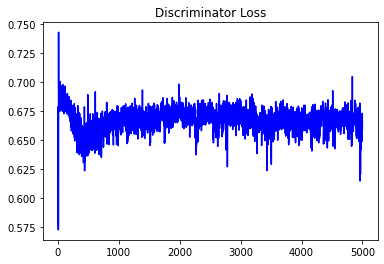

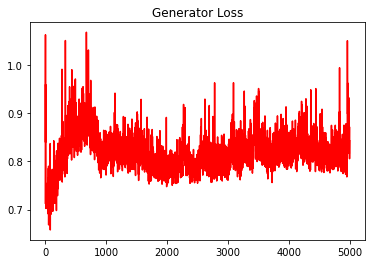

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

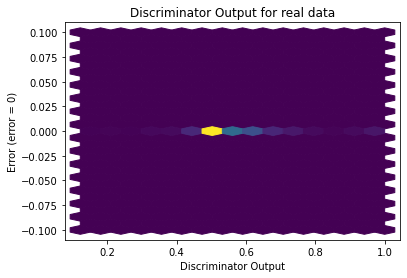

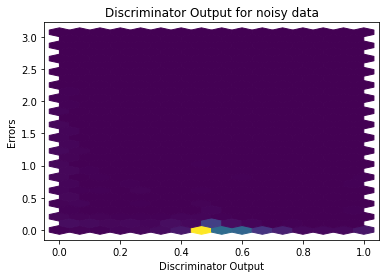

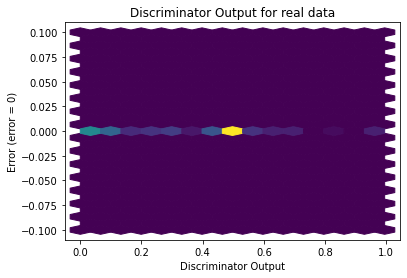

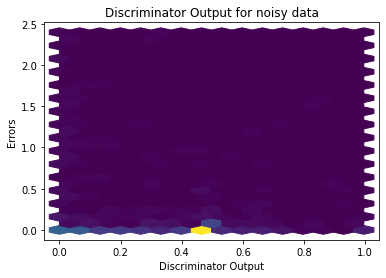

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


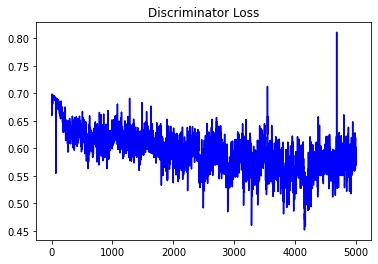

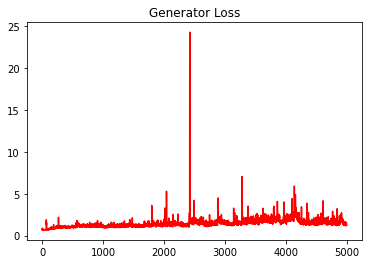

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

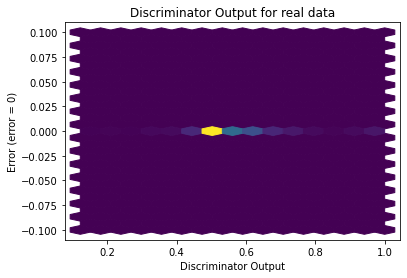

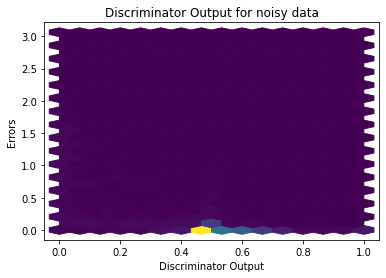

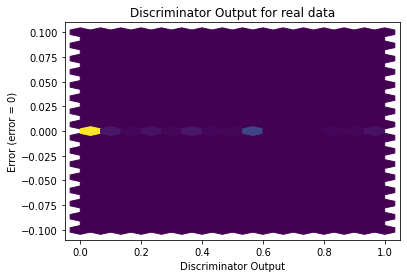

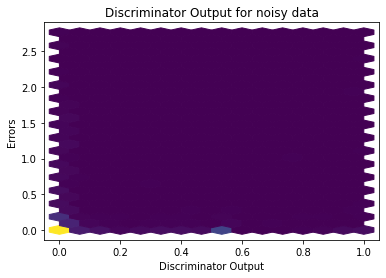

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9915]], device='cuda:0', requires_grad=True)
